# Model Evaluation

In [1]:
import os
os.chdir('../')

import random
import shutil
import glob
import cv2
import matplotlib.pyplot as plt
from IPython.display import Video

%pip install ultralytics -Uq
from ultralytics import YOLO

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Function to predict and visualize
def predict_and_visualize(model_path: str, test_dirpath: str, conf: float):
    # Getting the list of all the images in the directory
    imgs_list = glob.glob(os.path.join(test_dirpath, '*'))
    
    # Getting a random sample from the images list
    rand_imgs = random.sample(imgs_list, 10)
    
    # Loading the model
    model = YOLO(model_path)
    
    # Predicting and visualizing the random images
    plt.figure(figsize=(25, 10))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        
        # Reading the random images
        img = cv2.imread(rand_imgs[i])
        
        # Predicting the images and plotting it
        results = model.predict(img, conf=conf)
        pred_plot = results[0].plot()
        plot = cv2.cvtColor(pred_plot, cv2.COLOR_BGR2RGB)
        plt.imshow(plot)
        plt.axis(False);

## Experiment No. 1 - YOLOv8M Model

In [3]:
# Predicting val images on the best.pt model
exp1_best_model_path = 'retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/best.pt'
val_imgs_path = 'datasets/images/val'


0: 480x640 2 persons, 21.1ms
Speed: 4.0ms preprocess, 21.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 4 persons, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 2 persons, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 11.4ms
Speed: 2.3ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 10 persons, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 10 persons, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 5 persons, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 8 persons, 11.9ms
Speed: 2.3ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape 

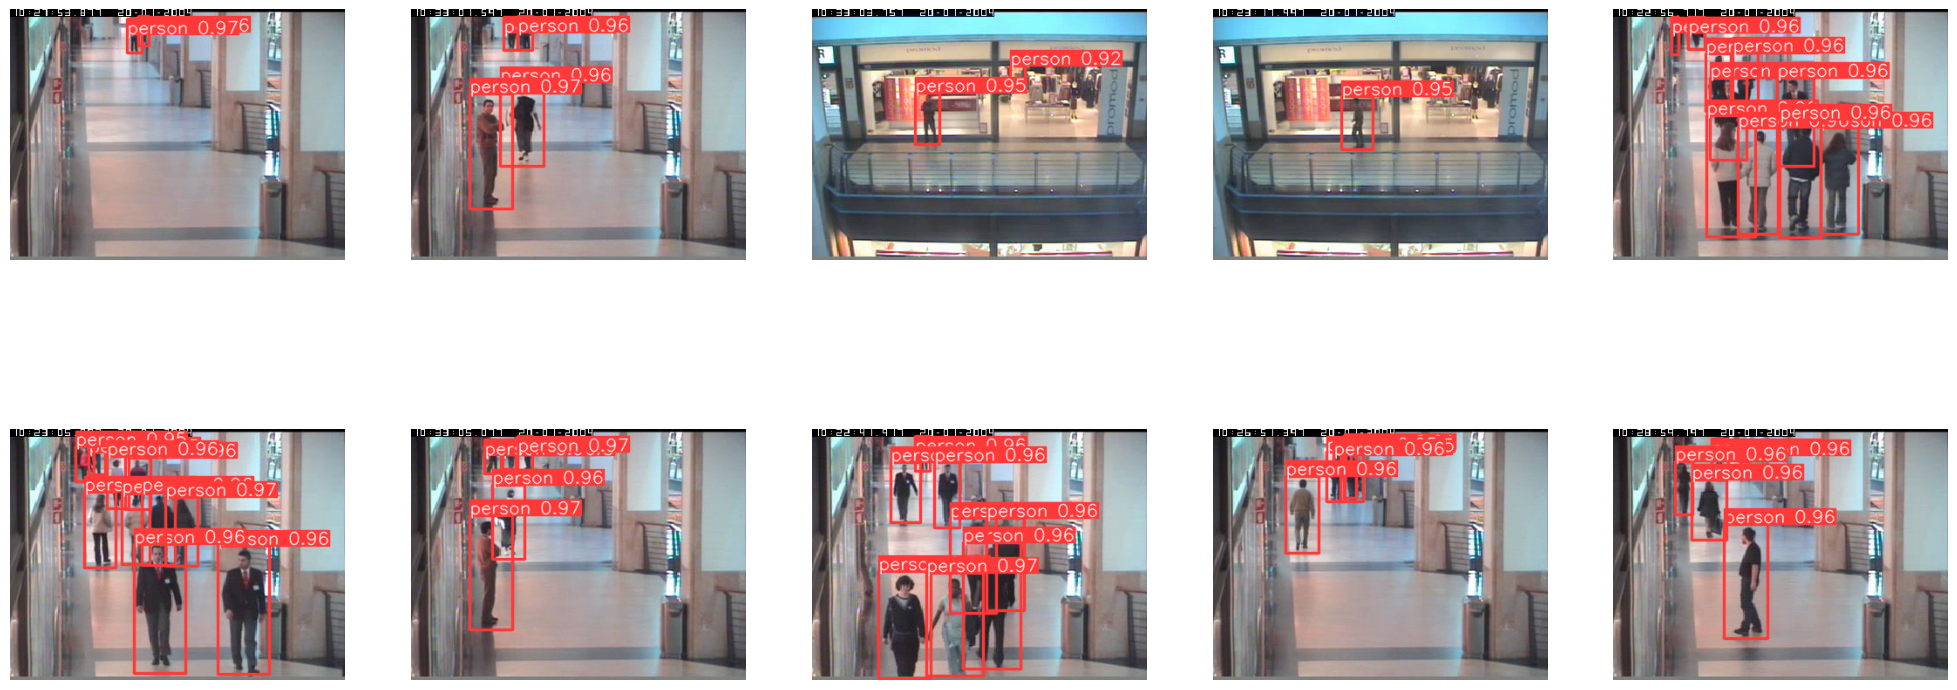

In [4]:
# Predicting and visualizing the model
predict_and_visualize(model_path=exp1_best_model_path,
                      test_dirpath=val_imgs_path,
                      conf=0.5)

In [5]:
# Testing the best weights on a youtube video
video_url = 'https://youtu.be/WvhYuDvH17I'
model = YOLO(exp1_best_model_path)
result = model.predict(video_url, conf=0.5, save=True, verbose=False)

1/1: https://youtu.be/WvhYuDvH17I... Success ✅ (341 frames of shape 1280x720 at 25.00 FPS)


    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
Results saved to runs/detect/predict2


In [ ]:
Video('runs/detect/predict2/WvhYuDvH17I.mp4')

# Model Export

In [7]:
# Exporting the Best Model of Experiment No. 1
model.export(format='onnx', imgsz=640)

Ultralytics YOLOv8.0.117 🚀 Python-3.9.16 torch-1.12.1+cu116 CPU

PyTorch: starting from retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 55.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.0
    Uninstalling protobuf-3.19.0:
      Successfully uninstalled protobuf-3.19.0

requirements: 1 package updated per ['onnx>=1.12.

'retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/best.onnx'

In [8]:
# Copying the model to the models directory
exp1_onnx_best_model_path = 'retail_vision_training_logs/exp1_yolov8m_ep200_pat20/weights/best.onnx'
models_dirpath = 'models/exp1_yolov8m'

if not os.path.exists(models_dirpath):
    os.makedirs(models_dirpath)
    
if os.path.isfile(exp1_onnx_best_model_path):
    shutil.copy2(exp1_onnx_best_model_path, models_dirpath)
    shutil.copy2(exp1_best_model_path, models_dirpath)
    print('[INFO] Experiment No. 1 Best Model is been copied to the models directory.')

[INFO] Experiment No. 1 Best Model is been copied to the models directory.
